# Libraries and Dataset loading
---

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from Neural_Networks_Modules import *


# Iris Dataset Importing 

In [130]:
data = pd.read_csv('Iris.csv' ,index_col=False)
data.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Analysis
---

In [3]:
# Check the Null values in the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sepal Length (in cm)  150 non-null    float64
 1   Sepal Width in (cm)   150 non-null    float64
 2   Petal length (in cm)  150 non-null    float64
 3   Petal width (in cm)   150 non-null    float64
 4   Class                 150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# detailed description about the data, understanding the characteristics of the data in a theoritical way
data.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [139]:
# Encode a Class Features

data.Class = data.Class.replace(to_replace = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] , value = [0,1,2] )


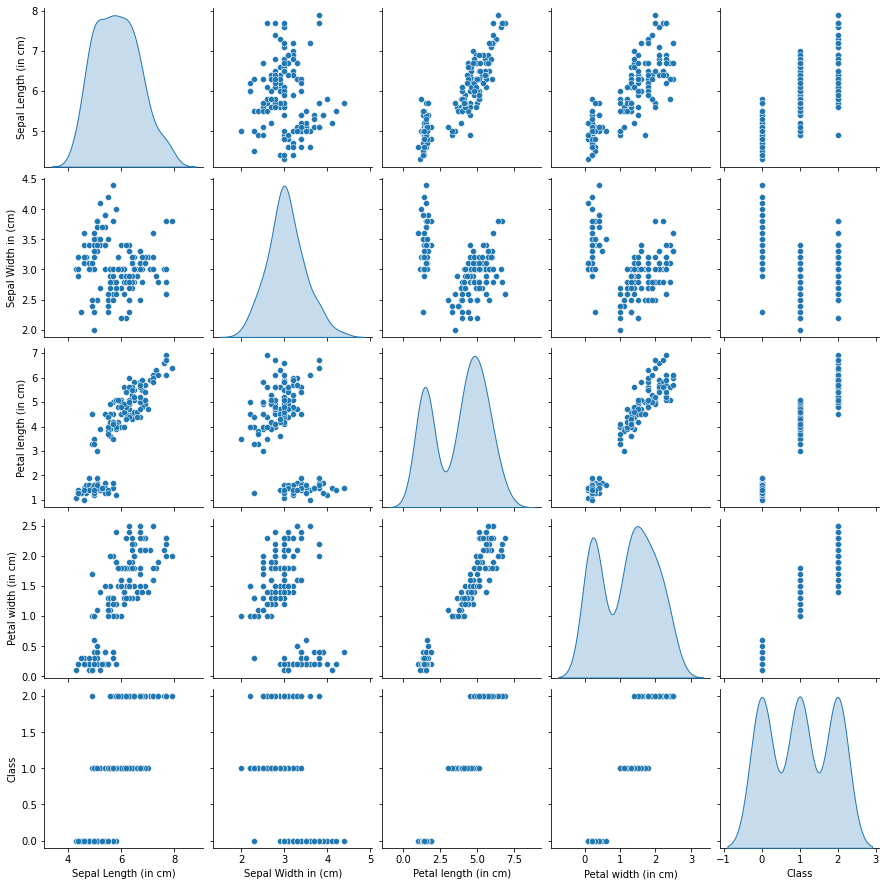

In [6]:
## visual understanding about the characteristics of the data, we can understand the impact of each and every features and 
## their distributions
sns.pairplot(data ,diag_kind= 'kde')

<AxesSubplot:>

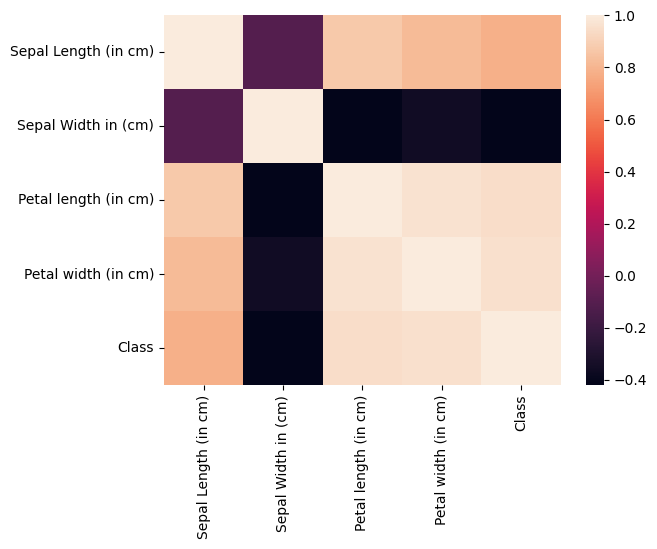

In [7]:
## understanding the relation of each and every features using correlation
sns.heatmap(data.corr())

In [8]:
data.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

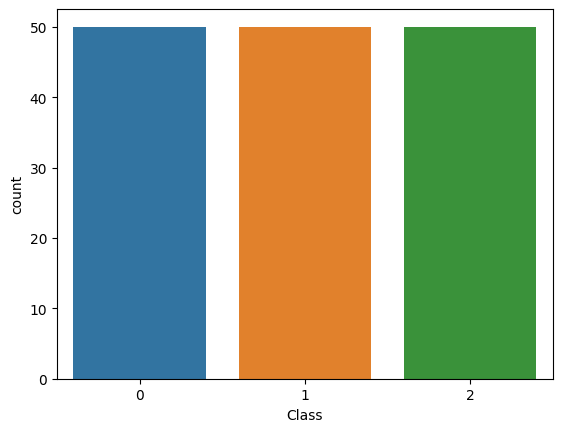

In [9]:
# check the class Balance
sns.countplot(x = 'Class',data = data)

# Based on the data analysis
:- Features don't contain Null values.  
:- Among four features have no outliers.   
:- Feature Petal length (in cm) and Petal width (in cm) are highly correlated each other (.96) .So we drop a feature Petal length (in cm).  
:- We have three class to predict and all three classes are balanced.   


In [131]:
# Removing Petal length feature
data.drop(labels = 'Petal length (in cm)' ,axis = 1 ,inplace = True )

In [117]:
# Spliting data
x = data[data.columns[:-1]]
y = np.array(data.Class).reshape(1, (data.Class).shape[0])
y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x ,y.reshape(150,3), test_size=0.2, random_state=42 ,shuffle= True)
x_train = x_train.T
y_train = y_train.reshape(1, y_train.shape[0])
x_test = x_test.T
y_test = y_test.reshape(1, y_test.shape[0])


# Neural Network
---

In [ ]:
iterations = 15
n_h = 6
learning_rate = 0.02
Parameters, train_cost_list ,test_cost_list = model(train_input = X_train,train_output =  Y_train, hidden_unit=  n_h, learning_rate = learning_rate, iterations = iterations ,test_input = X_test ,test_output = Y_test)